<a href="https://colab.research.google.com/github/juliablaz2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.- Encontrar los máximos de la función "picos"

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

1. Definición del problema y generación de la población inicial
Librerías que vamos a necesitar para resolver algoritmos genéticos con Phyton:
- deap: Es una biblioteca para la evolución diferencial y algoritmos genéticos en Python.
- matplotlib: Es una biblioteca para la creación de gráficos y visualizaciones en Python.
- numpy: Proporciona soporte para arrays y matrices, lo que es útil para manipular datos en algoritmos genéticos.
- scipy: Es una biblioteca que incluye funciones para la optimización y otras operaciones científicas.
- scoop: Es una biblioteca que permite la programación paralela en Python.


In [519]:
!pip install deap
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install scoop

Importamos librerías necesarias

In [520]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

#### NOTA SOBRE NÚMEROS ALEATORIOS

In [521]:
# Importamos la librería 'random' para generar números pseudo-aleatorios
import random

# Fijamos la semilla a 0 para garantizar reproducibilidad
# Si no cambiamos la semilla, la función generará los mismos números aleatorios en cada ejecución
random.seed(0)

# Generamos números pseudo-aleatorios en las listas 'x' e 'y' mediante list comprehensions
# Estos valores se encuentran en el rango de -100 a 100
x = [random.uniform(-100, 100) for i in range(10)]
y = [random.uniform(-100, 100) for i in range(10)]

# Imprimimos las listas generadas
print('x= ', x)
print('y= ', y)

x=  [68.88437030500961, 51.590880588060486, -15.885683833830996, -48.21664994140733, 2.254944273721705, -19.01317250991714, 56.75971780695451, -39.33745478421451, -4.680609169528836, 16.676407891006235]
y=  [81.62257703906704, 0.9373711634780477, -43.63243112005924, 51.16084083144477, 23.67379933506632, -49.898731727511894, 81.94925119364802, 96.55709520753061, 62.04344719931791, 80.43319008791653]


In [522]:
import numpy as np
# Fijamos la semilla
np.random.seed(0)
# Generamos los números pseudo-aleatorios
# Son los mismos mientras no cambiemos la semilla
# Numpy genera directamente los vectores
z = np.random.uniform(-100, 100, 10).reshape(1, 10)
t = np.random.uniform(-100, 100, 10).reshape(1, 10)
print('z= ', z)
print('t= ', t)

z=  [[  9.76270079  43.03787327  20.55267521   8.9766366  -15.26904013
   29.17882261 -12.48255775  78.35460016  92.7325521  -23.31169623]]
t=  [[ 58.34500762   5.77898395  13.60891222  85.11932766 -85.79278836
  -82.57414006 -95.95632051  66.52396911  55.63135019  74.00242965]]


#### NOTA 2: ESPACIO DE BÚSQUEDA O DOMINIO DE LA SOLUCIÓN -

Visualizamos la función y la dibujamos.

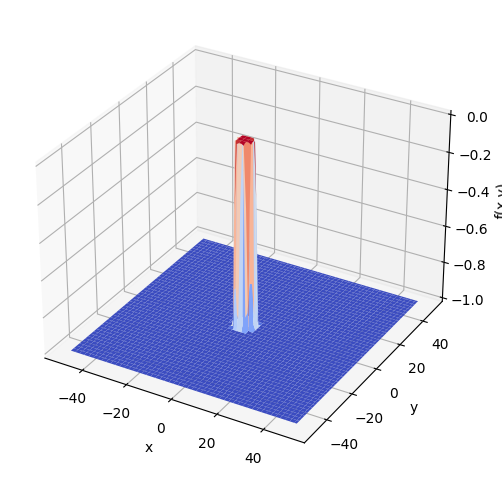

In [523]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def funcion_picos(x, y):
    term1 = 3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
    term2 = -10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    epsilon = 1e-8  # Pequeño valor para evitar divisiones por cero
    term3 = -1 / (3 * np.exp(-(x + 1)**2 - y**2) + epsilon)
    return term1 + term2 + term3

# Generamos vectores que barran todo el dominio
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)

# Evaluamos todos los valores de las variables y generamos la matriz z
x_ax, y_ax = np.meshgrid(x, y)
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
z = np.reshape([funcion_picos(val[0], val[1]) for val in vals], (100, 100))

# Representamos los resultados obtenidos
figure_3d = plt.figure(figsize=(8, 6))
ax = figure_3d.add_subplot(111, projection="3d")
ax.plot_surface(x_ax, y_ax, z, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.show()

#### 1. Definición del problema y generación de la población inicial

Importamos las librerias

In [524]:
import random
from deap import base
from deap import creator
from deap import tools

##### 1.1 Creación del problema

En esta etapa, creamos los objetos necesarios para definir el tipo de problema de optimización. Utilizamos el método 'create' de la clase 'creator' para generar una nueva clase llamada 'FitnessMax' que hereda de 'base.Fitness'. Esta clase tiene un atributo llamado 'weights' que se añadirá a la clase cuando se cree. En nuestro caso, estamos configurando un problema con un solo objetivo de maximización (porque 1.0 es positivo). La clase 'FitnessMax' hereda atributos como 'values', que almacena los valores de fitness de cada objetivo, 'dominates' que devuelve True si una solución es estrictamente peor que otra, y 'valid' que indica si el fitness de un individuo es válido.

In [525]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

Lo que realmente hemos hecho es:

```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class FitnessMax(base.Fitness):
  weights = (1.0,)
```

##### 1.2 Creación de la plantilla del individuo

iene el atributo 'fitness' inicializado con el objeto de 'FitnessMax'. En resumen, un individuo es una lista con un atributo que almacenará la calidad o desempeño del mismo.

In [526]:
# generamos la clase Individual que hereda de la clase list
creator.create("Individual", list, fitness=creator.FitnessMax)

Lo que realmente hemos hecho hasta ahora:
```
# Importamos las librerías necesarias
from deap import base

# Generamos la clase
class MaxFitness(base.Fitness):
  weights = (1.0,)

# Generamos la clase Individual
class Individual(list)
  fitness = MaxFitness
```

##### 1.3 Crear individuos aleatorios y población inicial

 A continuación, definimos el objeto 'toolbox' que contendrá funciones necesarias para ejecutar el algoritmo genético. Registramos la función 'attr_uniform' en el 'toolbox' utilizando el método 'register'. Esta función permite crear individuos aleatorios generando un valor aleatorio para cada variable independiente, siguiendo las restricciones de nuestro problema (-100,100)

In [527]:
toolbox = base.Toolbox()

In [528]:
# definimos la función attr_uniform para generar valores aleatorios
# Generación de genes
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [529]:
# definimos la clase Toolbox para almacenar funciones
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

-37.970486136133474

Luego, registramos la función 'individual' en el 'toolbox', que utiliza 'tools.initRepeat' para crear individuos completos con la función 'attr_uniform' tantas veces como variables independientes tengamos. En este caso, generamos 2 cromosomas (genes) por individuo.

In [530]:
# Generación de inviduos
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [531]:
# Ejemplo de la generación de un individuo aleatorio
individuo1 = toolbox.individual()
individuo1

[45.96634965202574, 79.7676575935987]

In [532]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo1.fitness.values

()

Por último, determinamos el rango de la población inicial en este escenario, eligiendo un numero de individuos que oscile entre 20 y 40. Esta selección se basa en la consideración de que ese número sea aproximadamente diez veces mayor que la cantidad de variables independientes involucradas.

In [533]:
# Generación de población
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 32)

In [534]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion1 = toolbox.population()
print(poblacion1)

[[36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885925, -83.91083628949292], [-35.98907906549084, 1.5881285041147777], [86.56676484538136, -78.18843081377926], [10.253449218110248, 41.312281973377935], [9.488182265684756, 62.8933726582672], [8.056721394064795, 92.76770919476019], [20.63712559227659, 17.52341283508727], [-11.00219474489677, 19.257372316621257], [-23.019770805467914, 15.130202832977702], [-41.934099519448395, -62.121734289128774], [-62.654094

In [535]:
# Cada individuo tiene 2 componentes
poblacion1[0]

[36.79678638308826, -5.571456909457325]

In [536]:
poblacion1[0].fitness.values

()

En este apartado, hemos configurado las funciones que se necesitan para la generación de individuos y población inicial, que será esencial para la ejecución del algoritmo genético.

#### 2. Función objetivo y operadores genéticos

##### 2.1 Función Objetivo

Dividimos las funciones objetivo en dos categorías:

1. Funciones Objetivo Codificadas en Python: Estas funciones objetivo están escritas directamente en el código Python utilizando bibliotecas como math o scipy. En el ejemplo que estamos presentando, seguimos este enfoque.

2. Funciones Objetivo que Llaman a un Programa Externo: Estas funciones objetivo requieren el uso de un programa externo para evaluar el rendimiento de un individuo, especialmente cuando se trata de modelos muy complejos. Para implementar esto, se utilizan los módulos nativos os o subprocess en Python. Sin embargo, en nuestro ejemplo, no utilizaremos esta estrategia.







In [537]:
def funcion_objetivo(x):
    """
    Función objetivo modificada para adaptarse al estilo de funcion_objetivo.
    """
    # Verificamos si los valores de x están dentro del rango permitido
    for i in range(len(x)):
        if x[i] > 100 or x[i] < -100:
            return -1,

    # Calculamos la función objetivo similar a la función_picos
    y = x[1]
    term1 = 3 * (1 - x[0])**2 * np.exp(-x[0]**2 - (y + 1)**2)
    term2 = -10 * (x[0]/5 - x[0]**3 - y**5) * np.exp(-x[0]**2 - y**2)
    epsilon = 1e-8  # Pequeño valor para evitar divisiones por cero
    term3 = -1 / (3 * np.exp(-(x[0] + 1)**2 - y**2) + epsilon)
    res = term1 + term2 + term3

    return res,

Si una solución no cumple con las reglas (si alguna de las dos variables está fuera de los límites), se le aplica lo que llamamos "pena de muerte" devolviendo -1. Esto significa que ese individuo no participará en las futuras operaciones importantes, como el cruce y la mutación. En términos sencillos, castigamos severamente a esa solución y no la consideramos para las generaciones futuras. Este enfoque se utiliza en problemas donde queremos maximizar la función objetivo y solo buscamos soluciones que contribuyan positivamente.

Ahora, procedemos a registrar la función de evaluación (o función objetivo) en la caja de herramientas.

In [538]:
toolbox.register("evaluate", funcion_objetivo)

Hay que recordad que la función de evaluación devuelve una tupla. Esto se debe a que la solución está diseñada para ser generalista y manejar problemas multiobjetivo, aunque en nuestro caso específico solo tengamos un objetivo.

#### 3. Incorporar los operadores genéticos

- Selección: En este paso, elegimos los individuos para el cruce y la mutación, priorizando a aquellos con mejor adaptación (fitness). Esto sigue la lógica de la teoría evolutiva de Darwin, donde los individuos más aptos tienen más probabilidades de dejar descendencia.

- Cruce: Es una operación que mezcla la información genética de dos individuos para crear dos nuevos.

- Mutación: Implica la modificación aleatoria de la información genética de un individuo para generar variación.

No hay valores universales para las probabilidades de cruce y mutación; deben ajustarse según el problema. Ambas operaciones son esenciales para explorar y explotar el espacio de búsqueda.

**CRUCE**


Usamos la operación de cruce en un punto, cxOnePoint, que elige aleatoriamente un punto en dos individuos (padres) para intercambiar su información genética.

In [539]:
# Registro de operacion genética de cruce
toolbox.register("mate", tools.cxOnePoint)


Dado que la longitud de los individuos es 2 en la función que proporcionaste, solo hay un punto de cruce posible. En este caso, el cruce simplemente implica intercambiar los valores de x e y entre los individuos seleccionados.

**MUTACIÓN**

Usamos mutación Gaussiana con media 0 y desviación estándar 5. Estos valores son solo ejemplos y pueden necesitar ajustes.

In [540]:
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

La función MutGaussian realiza mutaciones en cada gen del individuo con una probabilidad dada (indpb). La mutación implica sumar a cada gen una cantidad aleatoria generada mediante una distribución Gaussiana (normal) con media mu y desviación estándar sigma.

Cuando consideramos la mutación, es necesario definir dos probabilidades:

La probabilidad de mutar un individuo (se verá más adelante).
La probabilidad de mutar cada gen del individuo (indpb). Este último valor generalmente debería ser bajo para evitar modificaciones excesivas en el individuo. Probabilidades muy altas podrían dificultar la convergencia adecuada del algoritmo o evitar que se destaquen ciertas áreas del espacio de búsqueda.

In [541]:
toolbox.register("select", tools.selTournament, tournsize=3)

Establecemos la semilla del generador de numeros aleatorios para asegurar que los resultados sean reproducibles.

In [542]:
# Definimos la semilla del generador de números aleatorios
# Se hace así para tener resultados reproducibles
random.seed(42)

Definimos los parámetros inciales.

In [543]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
CXPB, MUTPB, NGEN = 0.5, 0.2, 20

Creamos la población inicial de individuos utilizando la función 'population' definida previamente en 'toolbox'

In [544]:
#Generamos la Población Inicial
pop = toolbox.population()
pop

[[27.885359691576753, -94.99784895546661],
 [-44.99413632617615, -55.35785237023545],
 [47.29424283280247, 35.33989748458225],
 [78.43591354096907, -82.61223347411678],
 [-15.61563606294591, -94.04055611238593],
 [-56.27240503927933, 1.0710576206724767],
 [-94.69280606322728, -60.2324698626703],
 [29.976887555904653, 8.98829612064334],
 [-55.911875591860664, 17.85313677518174],
 [61.88609133556534, -98.7002480643878],
 [61.163850366561576, 39.62787899764538],
 [-31.949896696401623, -68.90410003764369],
 [91.44261444135623, -32.68109097747465],
 [-81.45083132397042, -80.65672463330719],
 [69.49887326949195, 20.745206273378216],
 [61.42565465487604, 45.94635733876359],
 [7.245618290940143, 94.62315279587412],
 [-24.29312455832931, 10.408126254645396],
 [65.88093285059898, 23.703950472849215],
 [72.34138006215545, 15.470429051352411],
 [40.914367242984696, -90.83512326886756],
 [-54.42034486969063, -42.12240727957857],
 [-84.04160461527451, -53.44182272779396],
 [-79.79971411805417, -44.4

Establecemos un objeto para almacenar el mejor individuo encontrado a lo largo de las generaciones.

In [545]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
hof = tools.HallOfFame(1)
hof

In [546]:
print(hof)

[]


Configuramos un 'stats' para realizar un seguimiento de estadísticas como el promedio, la desviación estándar, el mínimo y el máximo de los valores de aptitud de la población.

In [547]:
# Definimos un objeto para generar las estadísticas de la
# población a lo largo de las generaciones del algoritmo
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [548]:
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

Creamos un registro 'logbook' para almacenar el progreso y los resultados del algoritmo genético a lo largo de las generaciones,

In [549]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

Utilizamos el algoritmo genético 'eaSimple' para evolucionar la población a lo largo de un número especificado de generaciones. Los parámetros incluyen la poblacion inicial 'pop', las herramientas 'toolbox', las probabilidades de cruce y mutación 'cxpb' y 'mutpb', el número de generaciones 'ngen', las estadísticas, el Hall of Fame y la opción de mostrar la información 'verbose=True'.

In [550]:
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg   	std	min   	max   
0  	32    	-1e+08	0  	-1e+08	-1e+08
1  	19    	-1e+08	0  	-1e+08	-1e+08
2  	27    	-1e+08	0  	-1e+08	-1e+08
3  	17    	-1e+08	0  	-1e+08	-1e+08
4  	20    	-1e+08	0  	-1e+08	-1e+08
5  	19    	-1e+08	0  	-1e+08	-1e+08
6  	18    	-1e+08	0  	-1e+08	-1e+08
7  	17    	-1e+08	0  	-1e+08	-1e+08
8  	20    	-1e+08	0  	-1e+08	-1e+08
9  	13    	-1e+08	0  	-1e+08	-1e+08
10 	20    	-1e+08	0  	-1e+08	-1e+08
11 	21    	-1e+08	0  	-1e+08	-1e+08
12 	18    	-1e+08	0  	-1e+08	-1e+08
13 	23    	-1e+08	0  	-1e+08	-1e+08
14 	18    	-1e+08	0  	-1e+08	-1e+08
15 	18    	-1e+08	0  	-1e+08	-1e+08
16 	19    	-9.6875e+07	1.73993e+07	-1e+08	-1    
17 	17    	-8.4375e+07	3.63092e+07	-1e+08	-1    
18 	28    	-5.9375e+07	4.91132e+07	-1e+08	-1    
19 	18    	-2.8125e+07	4.49609e+07	-1e+08	-1    
20 	22    	-6.25e+06  	2.42061e+07	-1e+08	-1    


Imprimimos la población final y el registro de evolución para su análisis.

In [551]:
print(pop)

[[27.840854258743867, 94.62315279587412], [61.42565465487604, 101.5109747910021], [61.42565465487604, 101.5109747910021], [61.42565465487604, 101.5109747910021], [61.42565465487604, 101.5109747910021], [61.42565465487604, 101.5109747910021], [61.42565465487604, 101.5109747910021], [56.300455790722346, 101.5109747910021], [53.51497966282975, 101.5109747910021], [53.51497966282975, 101.5109747910021], [61.42565465487604, 101.5109747910021], [61.42565465487604, 101.5109747910021], [34.0285454940293, 101.5109747910021], [53.51497966282975, 99.24350098978799], [27.840854258743867, 101.5109747910021], [61.42565465487604, 101.5109747910021], [61.42565465487604, 110.21333565413318], [61.42565465487604, 101.5109747910021], [34.0285454940293, 101.5109747910021], [34.0285454940293, 101.5109747910021], [78.43591354096907, 101.5109747910021], [34.0285454940293, 101.5109747910021], [27.840854258743867, 101.5109747910021], [27.840854258743867, 101.5109747910021], [34.0285454940293, 101.5109747910021]

In [552]:
print(logbook)

gen	nevals	avg        	std        	min   	max   
0  	32    	-1e+08     	0          	-1e+08	-1e+08
1  	19    	-1e+08     	0          	-1e+08	-1e+08
2  	27    	-1e+08     	0          	-1e+08	-1e+08
3  	17    	-1e+08     	0          	-1e+08	-1e+08
4  	20    	-1e+08     	0          	-1e+08	-1e+08
5  	19    	-1e+08     	0          	-1e+08	-1e+08
6  	18    	-1e+08     	0          	-1e+08	-1e+08
7  	17    	-1e+08     	0          	-1e+08	-1e+08
8  	20    	-1e+08     	0          	-1e+08	-1e+08
9  	13    	-1e+08     	0          	-1e+08	-1e+08
10 	20    	-1e+08     	0          	-1e+08	-1e+08
11 	21    	-1e+08     	0          	-1e+08	-1e+08
12 	18    	-1e+08     	0          	-1e+08	-1e+08
13 	23    	-1e+08     	0          	-1e+08	-1e+08
14 	18    	-1e+08     	0          	-1e+08	-1e+08
15 	18    	-1e+08     	0          	-1e+08	-1e+08
16 	19    	-9.6875e+07	1.73993e+07	-1e+08	-1    
17 	17    	-8.4375e+07	3.63092e+07	-1e+08	-1    
18 	28    	-5.9375e+07	4.91132e+07	-1e+08	-1    
19 	18    	-2.8125e+

In [553]:
def main():
    # Definimos la semilla del generador de números aleatorios
    # Se hace así para tener resultados reproducibles
    random.seed(42)

    # Definimos:
    #  CXPB: Probabilidad de Cruce
    #  MUTPB: Probabilidad de Mutación
    #  NGEN: Número de Generaciones
    # Los valores son de prueba para obtener unos resultados preeliminares
    CXPB, MUTPB, NGEN = 0.5, 0.2, 20

    #Generamos la Población Inicial
    pop = toolbox.population()

    # Definimos el objeto hof que almacenará el mejor individuo
    # encontrado a lo largo de las generaciones del Algoritmo G.
    hof = tools.HallOfFame(1)

    # Definimos un objeto para generar las estadísticas de la
    # población a lo largo de las generaciones del algoritmo
    stats = tools.Statistics(lambda ind: ind.fitness.values)

    # Registramos en el objeto stats
    # las funciones estadísticas a usar
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # loogbook contendrá todo el registro de evolución
    logbook = tools.Logbook()

    # Algoritmo eaSimple, devuelve la población final y el registro de evolución
    # y tiene como entrada:
    # population – población inicial
    # toolbox – La caja de herramientas con todas las funciones necesarias
    # cxpb – Probabilidad de cruce en tanto por uno
    # mutpb – Probabilidad de mutación en tanto por uno
    # ngen – Nº de generaciones del algoritmo
    # stats – Objeto estadístico con las funciones registradas (opcional)
    # halloffame – Objeto del tipo HallOfFame con los mejores individuos por generación, opcional
    # verbose – Si se deben mostrar o no las estadísticas de cada generación
    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

    # Devolvemos el HallOfFame y el registro de evolución
    return hof, logbook

##### 4.2 Resultados del Algoritmo Genético

Llamamos a la función principal'main()' que contiene la lógica central del algortimo genético. Devuelve dos valores: 'best' que se refiere al mejor individuo y 'log' que es el registro de evolución.

Imprimimos el valor de aptitud del mejor individuo encontrado. 'best[0].fitness.values' accede al valor de aptitud del primer individuo en la lista 'best', nos devuelve una medida de lo bueno que es el individuo en términos del objetivo de optimización.

In [554]:
best, log = main()
print("Mejor fitness: %f" %best[0].fitness.values)
print("Mejor individuo %s" %best[0])

gen	nevals	avg   	std	min   	max   
0  	32    	-1e+08	0  	-1e+08	-1e+08
1  	19    	-1e+08	0  	-1e+08	-1e+08
2  	27    	-1e+08	0  	-1e+08	-1e+08
3  	17    	-1e+08	0  	-1e+08	-1e+08
4  	20    	-1e+08	0  	-1e+08	-1e+08
5  	19    	-1e+08	0  	-1e+08	-1e+08
6  	18    	-1e+08	0  	-1e+08	-1e+08
7  	17    	-1e+08	0  	-1e+08	-1e+08
8  	20    	-1e+08	0  	-1e+08	-1e+08
9  	13    	-1e+08	0  	-1e+08	-1e+08
10 	20    	-1e+08	0  	-1e+08	-1e+08
11 	21    	-1e+08	0  	-1e+08	-1e+08
12 	18    	-1e+08	0  	-1e+08	-1e+08
13 	23    	-1e+08	0  	-1e+08	-1e+08
14 	18    	-1e+08	0  	-1e+08	-1e+08
15 	18    	-1e+08	0  	-1e+08	-1e+08
16 	19    	-9.6875e+07	1.73993e+07	-1e+08	-1    
17 	17    	-8.4375e+07	3.63092e+07	-1e+08	-1    
18 	28    	-5.9375e+07	4.91132e+07	-1e+08	-1    
19 	18    	-2.8125e+07	4.49609e+07	-1e+08	-1    
20 	22    	-6.25e+06  	2.42061e+07	-1e+08	-1    
Mejor fitness: -1.000000
Mejor individuo [34.0285454940293, 101.5109747910021]


2.- Dada la [Función de Rastringin](https://en.wikipedia.org/wiki/Rastrigin_function#:~:text=In%20mathematical%20optimization%2C%20the%20Rastrigin,has%20been%20generalized%20by%20Rudolph.), con A = 10 y  $$\{xi\} \in [-5.12,5.12]$$

Implementa dicha función en Python y minimízala para n=10

Compara el funcionamiento del Algoritmo Genético para cruce con un punto con cruce con dos puntos

#### 1. Importación de bibliotecas

Se importan las bibliotecas necesarias para el manejo de algoritmos genéticos, operadores evolutivos y visualización de resultados.

In [559]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

#### 2. Creación de tipos y función objetivo

Se crean tipos de objeto utilizando la biblioteca DEAP. FitnessMin se utiliza para minimización y Individual define la estructura de un individuo.

In [560]:
# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

#### 3. Función de Rastrigin

Se define la función de Rastrigin para minimización. Esta función será utilizada como función objetivo para evaluar la aptitud de los individuos.

In [561]:
def rastrigin(individual):
    A = 10
    n = len(individual)
    return A * n + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in individual]),

#### 4. Configuración de la toolbox

- Se crea una instancia de la Toolbox para contener las funciones y operadores.
- Se registra el generador de genes, que utiliza números uniformemente distribuidos en el rango [-5.12, 5.12].
- Se registra el generador de individuos, que utiliza el generador de genes y crea listas de longitud 10.
- Se registra el generador de población, que utiliza el generador de individuos y crea listas de longitud 30.

In [562]:
toolbox = base.Toolbox()

toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_uniform, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 30)
toolbox.register("evaluate", rastrigin)
toolbox.register("mate_onepoint", tools.cxOnePoint)
toolbox.register("mate_twopoints", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

#### 3. Registro de operaciones genéticas

- Se registra la función de evaluación (evaluate) con la función objetivo definida anteriormente.
- Se registran dos operadores de cruce, uno con un punto (mate_onepoint) y otro con dos puntos (mate_twopoints).
- Se registra el operador de mutación gaussiana (mutate) con parámetros mu, sigma e indpb.
- Se registra el operador de selección de tipo torneo (select) con un tamaño de torneo de 3.

In [563]:
toolbox.register("evaluate", rastrigin)
toolbox.register("mate_onepoint", tools.cxOnePoint)
toolbox.register("mate_twopoints", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

#### 5. Función para la representar la evolución

Se define una función para visualizar la evolución del mejor individuo en cada generación. Utiliza el objeto log que contiene información sobre la evolución.

In [564]:
def plot_evolucion(log, title):
    """
    Representa la evolución del mejor individuo en cada generación.
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    ax1.set_title(title)
    plt.grid(True)
    plt.show()

#### 6. Función principal del algoritmo genético

Se define la función principal que realiza la configuración, ejecución y registro de estadísticas para ambos algoritmos genéticos con diferentes operadores de cruce.

In [565]:
def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.7, 0.2, 50
    pop_onepoint = toolbox.population()
    pop_twopoints = toolbox.population()

    hof_onepoint = tools.HallOfFame(1)
    hof_twopoints = tools.HallOfFame(1)

    stats_onepoint = tools.Statistics(lambda ind: ind.fitness.values)
    stats_onepoint.register("avg", np.mean)
    stats_onepoint.register("std", np.std)
    stats_onepoint.register("min", np.min)
    stats_onepoint.register("max", np.max)

    stats_twopoints = tools.Statistics(lambda ind: ind.fitness.values)
    stats_twopoints.register("avg", np.mean)
    stats_twopoints.register("std", np.std)
    stats_twopoints.register("min", np.min)
    stats_twopoints.register("max", np.max)

    logbook_onepoint = tools.Logbook()
    logbook_twopoints = tools.Logbook()

    # Algoritmo genético con cruce de un punto
    toolbox.unregister("mate")
    toolbox.register("mate", tools.cxOnePoint)

    pop_onepoint, logbook_onepoint = algorithms.eaSimple(
        pop_onepoint, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
        stats=stats_onepoint, halloffame=hof_onepoint, verbose=True
    )

    # Algoritmo genético con cruce de dos puntos
    toolbox.unregister("mate")
    toolbox.register("mate", tools.cxTwoPoint)

    pop_twopoints, logbook_twopoints = algorithms.eaSimple(
        pop_twopoints, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
        stats=stats_twopoints, halloffame=hof_twopoints, verbose=True
    )

    return hof_onepoint, logbook_onepoint, hof_twopoints, logbook_twopoints

#### 7. Configuración de parámetros y ejecución del algoritmo genético

Se configuran los parámetros del algoritmo (probabilidad de cruce, probabilidad de mutación, número de generaciones) y se ejecutan los algoritmos genéticos con diferentes operadores de cruce.

#### 8. Impresión de resultados

Se imprimen los resultados finales del mejor fitness y el mejor individuo para ambos algoritmos.

In [566]:
print("Mejor fitness con cruce de un punto: %f" % hof_onepoint[0].fitness.values)
print("Mejor individuo con cruce de un punto: %s" % hof_onepoint[0])

print("Mejor fitness con cruce de dos puntos: %f" % hof_twopoints[0].fitness.values)
print("Mejor individuo con cruce de dos puntos: %s" % hof_twopoints[0])

Mejor fitness con cruce de un punto: 20.330403
Mejor individuo con cruce de un punto: [2.094815602840816, 0.8568042423421414, 0.927849553217032, -0.9694714231833084, -1.0301388273623324, -0.900791195516049, 0.05865711859804468, -0.023394519040169426, 0.9678761321824378, -0.06608550562378501]
Mejor fitness con cruce de dos puntos: 22.155907
Mejor individuo con cruce de dos puntos: [-0.946182454614152, -2.044699973516655, -1.9529250589833906, -0.9380566157392192, -0.057577789333126184, 1.0282149357244839, 1.0552464091164373, -1.100916601325291, 1.0091143327101584, -0.11424504547236725]


#### 9. Visualización de la evolución

Se muestra la evolución del mejor individuo en cada generación para ambos algoritmos genéticos.

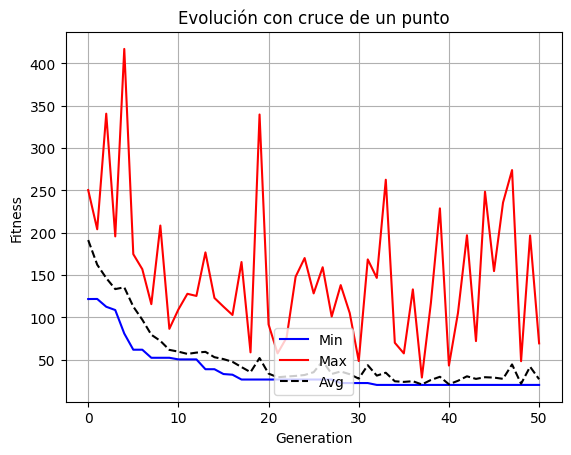

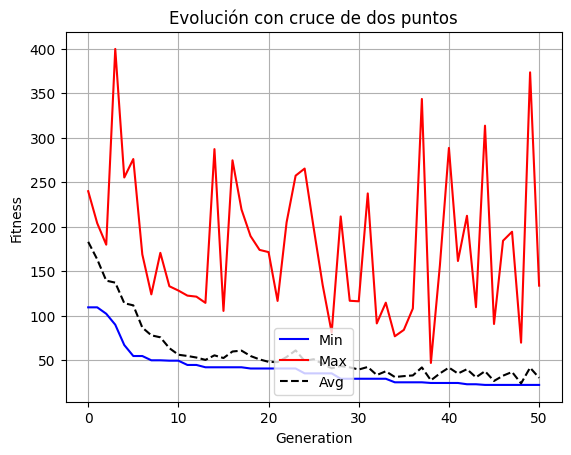

In [567]:
plot_evolucion(log_onepoint, "Evolución con cruce de un punto")
plot_evolucion(log_twopoints, "Evolución con cruce de dos puntos")

#### 10. Código completo

gen	nevals	avg    	std    	min    	max    
0  	30    	191.428	30.3561	121.772	250.492
1  	28    	162.313	25.4198	121.858	204.178
2  	18    	146.544	38.734 	112.655	340.706
3  	25    	133.519	18.5533	108.773	195.757
4  	23    	135.639	60.4304	81.0305	417.193
5  	24    	112.844	22.722 	61.9248	174.793
6  	26    	97.338 	22.1361	61.9248	157.021
7  	19    	79.5796	16.4597	52.3903	115.709
8  	24    	72.378 	27.8017	52.3903	208.578
9  	26    	61.7163	6.34816	52.3903	86.5954
10 	20    	59.6511	11.5361	50.4828	109.416
11 	25    	56.9596	14.2927	50.4828	127.961
12 	21    	58.4971	18.8985	50.4828	125.429
13 	27    	59.3947	25.9453	38.8825	176.877
14 	21    	53.0584	15.9961	38.8825	123.043
15 	21    	50.8416	18.4484	33.1829	112.784
16 	26    	47.6174	17.9869	32.3985	102.954
17 	20    	41.4133	23.749 	26.6988	165.468
18 	24    	35.3968	6.17035	26.6988	58.771 
19 	23    	52.0643	64.3488	26.6988	339.737
20 	26    	33.7213	13.2094	26.6988	91.7954
21 	22    	29.3672	6.5002 	26.6988	57.5957
22 	26    	

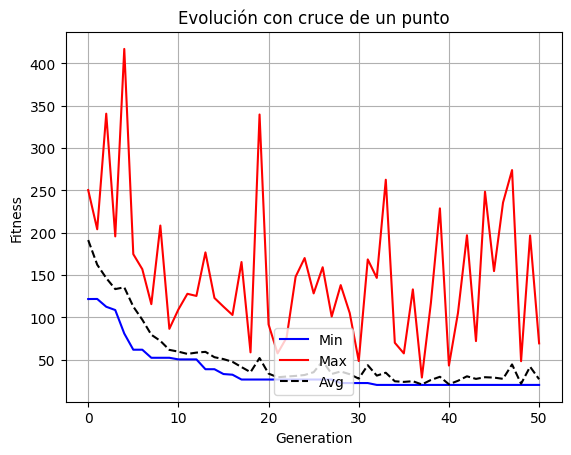

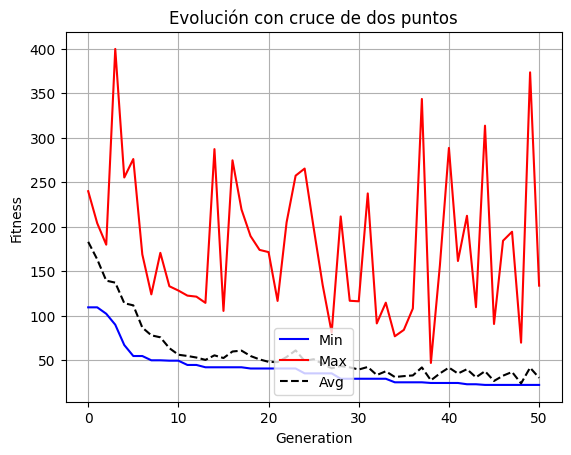

In [568]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def rastrigin(individual):
    """
    Función de Rastrigin para minimización.
    """
    A = 10
    n = len(individual)
    return A * n + sum([(x**2 - A * np.cos(2 * math.pi * x)) for x in individual]),

toolbox = base.Toolbox()

# Generación de genes
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

# Generación de individuos y población
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 10)
toolbox.register("population", tools.initRepeat, list,
                 toolbox.individual, 30)

# Registro de operaciones genéticas
toolbox.register("evaluate", rastrigin)
toolbox.register("mate_onepoint", tools.cxOnePoint)
toolbox.register("mate_twopoints", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Olvidé registrar la operación de cruce (mate)
toolbox.register("mate", tools.cxOnePoint)

def plot_evolucion(log, title):
    """
    Representa la evolución del mejor individuo en cada generación.
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")

    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness")
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    ax1.set_title(title)
    plt.grid(True)
    plt.show()

def main():
    random.seed(42)
    CXPB, MUTPB, NGEN = 0.7, 0.2, 50
    pop_onepoint = toolbox.population()
    pop_twopoints = toolbox.population()

    hof_onepoint = tools.HallOfFame(1)
    hof_twopoints = tools.HallOfFame(1)

    stats_onepoint = tools.Statistics(lambda ind: ind.fitness.values)
    stats_onepoint.register("avg", np.mean)
    stats_onepoint.register("std", np.std)
    stats_onepoint.register("min", np.min)
    stats_onepoint.register("max", np.max)

    stats_twopoints = tools.Statistics(lambda ind: ind.fitness.values)
    stats_twopoints.register("avg", np.mean)
    stats_twopoints.register("std", np.std)
    stats_twopoints.register("min", np.min)
    stats_twopoints.register("max", np.max)

    logbook_onepoint = tools.Logbook()
    logbook_twopoints = tools.Logbook()

    # Algoritmo genético con cruce de un punto
    toolbox.unregister("mate")
    toolbox.register("mate", tools.cxOnePoint)

    pop_onepoint, logbook_onepoint = algorithms.eaSimple(
        pop_onepoint, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
        stats=stats_onepoint, halloffame=hof_onepoint, verbose=True
    )

    # Algoritmo genético con cruce de dos puntos
    toolbox.unregister("mate")
    toolbox.register("mate", tools.cxTwoPoint)

    pop_twopoints, logbook_twopoints = algorithms.eaSimple(
        pop_twopoints, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN,
        stats=stats_twopoints, halloffame=hof_twopoints, verbose=True
    )

    return hof_onepoint, logbook_onepoint, hof_twopoints, logbook_twopoints

hof_onepoint, log_onepoint, hof_twopoints, log_twopoints = main()

print("Mejor fitness con cruce de un punto: %f" % hof_onepoint[0].fitness.values)
print("Mejor individuo con cruce de un punto: %s" % hof_onepoint[0])

print("Mejor fitness con cruce de dos puntos: %f" % hof_twopoints[0].fitness.values)
print("Mejor individuo con cruce de dos puntos: %s" % hof_twopoints[0])

plot_evolucion(log_onepoint, "Evolución con cruce de un punto")
plot_evolucion(log_twopoints, "Evolución con cruce de dos puntos")

#### 11. Conclusiones y resultados

El código implementa algoritmos genéticos para minimizar la función de Rastrigin en un espacio de búsqueda definido entre -5.12 y 5.12 para cada variable. Se comparan dos operadores de cruce, uno con un punto y otro con dos puntos. La evolución de la aptitud a lo largo de 50 generaciones muestra que ambos algoritmos logran disminuir la aptitud promedio, con fluctuaciones ocasionales. El mejor individuo encontrado por el cruce de un punto tiene una aptitud de 20.33, representado por el vector [2.09, 0.86, 0.93, -0.97, -1.03, -0.90, 0.06, -0.02, 0.97, -0.07]. En comparación, el cruce de dos puntos produce un mejor individuo con una aptitud de 22.16, representado por el vector [-0.95, -2.04, -1.95, -0.94, -0.06, 1.03, 1.06, -1.10, 1.01, -0.11].

Ambos algoritmos convergen a soluciones efectivas, y no hay una diferencia sustancial entre ellos en este caso específico. La elección entre los operadores de cruce puede depender de las características específicas del problema y de la naturaleza del espacio de búsqueda.